In [71]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [72]:
mnist_training_data = pd.read_csv("mnist_train.csv")
mnist_testing_data = pd.read_csv("mnist_test.csv")

In [73]:
mnist_training_data.shape

(60000, 785)

In [74]:
mnist_training_data.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
mnist_testing_data.shape

(10000, 785)

In [76]:
mnist_testing_data.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


5
0
4
1
9


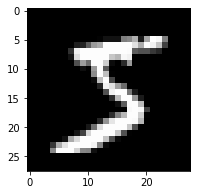

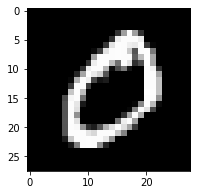

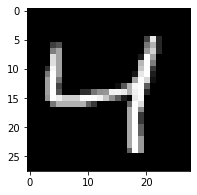

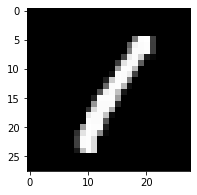

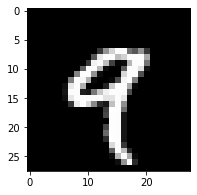

In [77]:
for i in range(5):
    tem_pixel=mnist_training_data.loc[i][1:]
    # plot MNIST numbers
    plt.figure(figsize=(3,3))
    grid_data = tem_pixel.values.reshape(28,28)
    plt.imshow(grid_data, cmap='gray')
    print(mnist_training_data.loc[i][0])

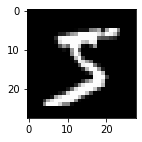

In [105]:
tem_pixel=mnist_training_data.loc[0][1:]
plt.figure(figsize=(2,2))
grid_data = tem_pixel.values.reshape(28,28)
plt.imshow(grid_data, cmap='gray')

Text(0.5, 1.0, 'Distribution of MNIST Images (Training Set)')

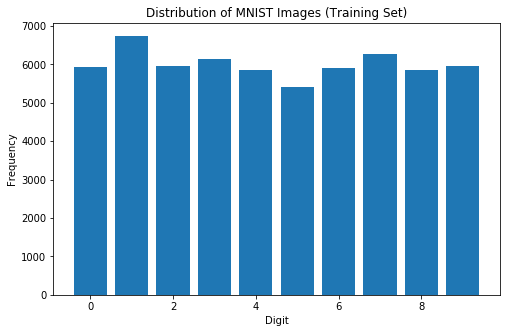

In [79]:
num_label=[0]*10
for num in mnist_training_data['label']:
    num_label[num] += 1
plt.figure(figsize=(8,5))
x = np.arange(10)
plt.bar(x, height=num_label)
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.title("Distribution of MNIST Images (Training Set)")

Text(0.5, 1.0, 'Distribution of MNIST Images (Testing Set)')

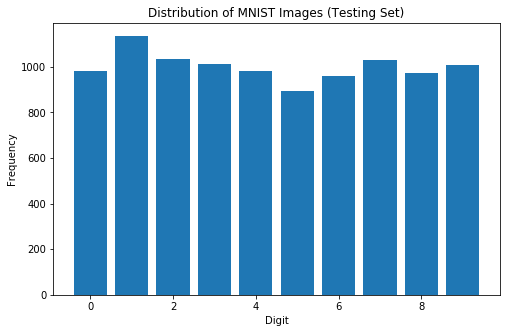

In [80]:
num_label=[0]*10
for num in mnist_testing_data['label']:
    num_label[num] += 1
plt.figure(figsize=(8,5))
x = np.arange(10)
plt.bar(x, height=num_label)
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.title("Distribution of MNIST Images (Testing Set)")

In [81]:
X_train = mnist_training_data.drop(['label'], axis='columns', inplace=False)
Y_train = mnist_training_data['label']
X_test = mnist_testing_data.drop(['label'], axis='columns', inplace=False)
Y_test = mnist_testing_data['label']

# 可以把30換成其他值，做比較

In [103]:
# Dimension Reduction
# 使用主成分分析(Principal components analysis，PCA)實現
pca = PCA(n_components=30)
new_X_train = pca.fit_transform(X_train)
new_X_test = pca.transform(X_test)
# 維度減完在進行辨識器的訓練前我們先對資料進行歸一化(normalization)的動作
# 把每一筆input data都除上255使其值落在0~1之間
# 很重要，一定要做
new_X_train = new_X_train/255
new_X_test = new_X_test/255
print(pca.n_components_)
print(sum(pca.explained_variance_ratio_))
# 維度降至30的版本，僅解釋掉了73%的變異

30
0.7305368690269265


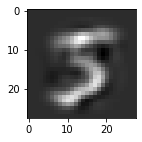

In [104]:
# 降到30維，所畫出的圖
img = pca.inverse_transform(new_X_train[0]*255)
img = img.reshape(28,28)
plt.figure(figsize=(2,2))
plt.imshow(img, cmap='gray')
plt.show()

# 使用SVC(Support Vector Classification)進行模型的訓練與辨識
# SVC+PCA(30)

In [13]:
clf = SVC()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 0.9885666666666667
測試資料辨識率: 0.9803
Precision: 0.9803101872977882
Recall: 0.9801430517562523


# KNN+PCA(30)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 0.9851
測試資料辨識率: 0.9754
Precision: 0.9754269394500706
Recall: 0.9752194711024155


# DecisionTree+PCA(30)

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.849
Precision: 0.8467359147887128
Recall: 0.8468455890509977


# RandomForest+PCA(30)

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.9538
Precision: 0.953189855371558
Recall: 0.9534061531074336


# 使用SVC(Support Vector Classification)進行模型的訓練與辨識
# SVC+PCA(1)

In [17]:
pca = PCA(n_components=1)
new_X_train = pca.fit_transform(X_train)
new_X_test = pca.transform(X_test)
new_X_train = new_X_train/255
new_X_test = new_X_test/255
print(pca.n_components_)
print(sum(pca.explained_variance_ratio_))

1
0.09704664359260148


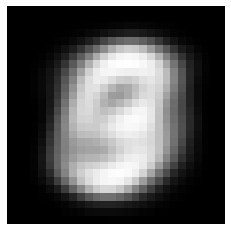

5


In [18]:
img = pca.inverse_transform(new_X_train[0]*255)
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])

In [19]:
clf = SVC()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 0.30605
測試資料辨識率: 0.3151


D:\Anaconda3\envs\data_extract\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.20797141555122645
Recall: 0.3037232012647822


# KNN+PCA(1)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 0.47855
測試資料辨識率: 0.2738
Precision: 0.23564190208497499
Recall: 0.26384215243044734


# DecisionTree+PCA(1)

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 0.9991166666666667
測試資料辨識率: 0.2487
Precision: 0.239450460759396
Recall: 0.24015344100095706


# RandomForest+PCA(1)

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 0.999
測試資料辨識率: 0.2488
Precision: 0.23954590817334392
Recall: 0.24025782513456875


# 使用SVC(Support Vector Classification)進行模型的訓練與辨識
# SVC+PCA(5)

In [23]:
pca = PCA(n_components=5)
new_X_train = pca.fit_transform(X_train)
new_X_test = pca.transform(X_test)
new_X_train = new_X_train/255
new_X_test = new_X_test/255
print(pca.n_components_)
print(sum(pca.explained_variance_ratio_))

5
0.33227893634141975


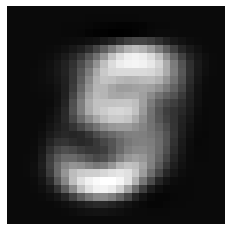

5


In [24]:
img = pca.inverse_transform(new_X_train[0]*255)
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])

In [25]:
clf = SVC()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 0.7647833333333334
測試資料辨識率: 0.7728
Precision: 0.7736068635941942
Recall: 0.7708339020864816


# KNN+PCA(5)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 0.8136666666666666
測試資料辨識率: 0.7475
Precision: 0.7449080716470864
Recall: 0.7445301752302317


# DecisionTree+PCA(5)

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.6693
Precision: 0.6651341377390831
Recall: 0.66499198389969


# RandomForest+PCA(5)

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 0.9999833333333333
測試資料辨識率: 0.7628
Precision: 0.7616183094922361
Recall: 0.7602890175043916


# 使用SVC(Support Vector Classification)進行模型的訓練與辨識
# SVC+PCA(10)

In [29]:
pca = PCA(n_components=10)
new_X_train = pca.fit_transform(X_train)
new_X_test = pca.transform(X_test)
new_X_train = new_X_train/255
new_X_test = new_X_test/255
print(pca.n_components_)
print(sum(pca.explained_variance_ratio_))

10
0.4881497551225863


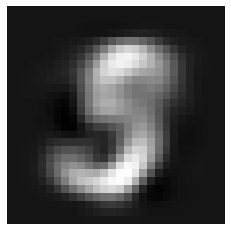

5


In [30]:
img = pca.inverse_transform(new_X_train[0]*255)
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])

In [31]:
clf = SVC()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 0.9434
測試資料辨識率: 0.9364
Precision: 0.9354876446997755
Recall: 0.9355616745644273


# KNN+PCA(10)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 0.9545166666666667
測試資料辨識率: 0.9276
Precision: 0.9267769110085741
Recall: 0.9266610474201146


# DecisionTree+PCA(10)

In [33]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.8238
Precision: 0.8216259060437215
Recall: 0.821301049771531


# RandomForest+PCA(10)

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.9139
Precision: 0.9130073375859767
Recall: 0.9126952752361529


# 使用SVC(Support Vector Classification)進行模型的訓練與辨識
# SVC+PCA(20)

In [35]:
pca = PCA(n_components=20)
new_X_train = pca.fit_transform(X_train)
new_X_test = pca.transform(X_test)
new_X_train = new_X_train/255
new_X_test = new_X_test/255
print(pca.n_components_)
print(sum(pca.explained_variance_ratio_))

20
0.643576394098479


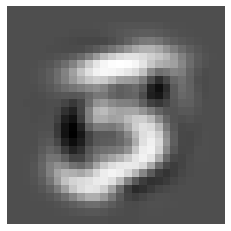

5


In [36]:
img = pca.inverse_transform(new_X_train[0]*255)
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])

In [37]:
clf = SVC()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 0.98275
測試資料辨識率: 0.9754
Precision: 0.9753012942867718
Recall: 0.9751649537433172


# KNN+PCA(20)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 0.9810833333333333
測試資料辨識率: 0.9692
Precision: 0.9691496569298466
Recall: 0.9688926587476955


# DecisionTree+PCA(20)

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.8525
Precision: 0.8502369440755357
Recall: 0.8502000204228416


# RandomForest+PCA(20)

In [40]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.9507
Precision: 0.9500444820261192
Recall: 0.9502542378709148


# 使用SVC(Support Vector Classification)進行模型的訓練與辨識
# SVC+PCA(50)

In [41]:
pca = PCA(n_components=50)
new_X_train = pca.fit_transform(X_train)
new_X_test = pca.transform(X_test)
new_X_train = new_X_train/255
new_X_test = new_X_test/255
print(pca.n_components_)
print(sum(pca.explained_variance_ratio_))

50
0.8245917293935027


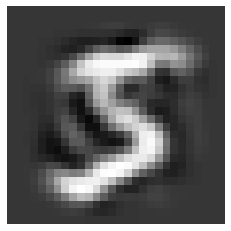

5


In [42]:
img = pca.inverse_transform(new_X_train[0]*255)
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])

In [43]:
clf = SVC()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 0.99135
測試資料辨識率: 0.9833
Precision: 0.9832948641736536
Recall: 0.9832019382858762


# KNN+PCA(50)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 0.9858
測試資料辨識率: 0.9749
Precision: 0.9749835463468177
Recall: 0.9746814062801148


# DecisionTree+PCA(50)

In [45]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.8434
Precision: 0.8410835632157383
Recall: 0.8411109103649507


# RandomForest+PCA(50)

In [46]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.9554
Precision: 0.9549582974929851
Recall: 0.9550017388114854


# 使用SVC(Support Vector Classification)進行模型的訓練與辨識
# SVC+PCA(100)

In [47]:
pca = PCA(n_components=100)
new_X_train = pca.fit_transform(X_train)
new_X_test = pca.transform(X_test)
new_X_train = new_X_train/255
new_X_test = new_X_test/255
print(pca.n_components_)
print(sum(pca.explained_variance_ratio_))

100
0.9142000378903992


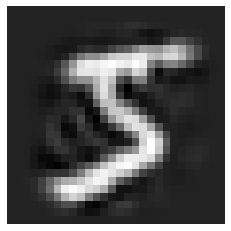

5


In [48]:
img = pca.inverse_transform(new_X_train[0]*255)
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])

In [49]:
clf = SVC()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 0.99275
測試資料辨識率: 0.9841
Precision: 0.9840574732295497
Recall: 0.9840318335390672


# KNN+PCA(100)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 0.98435
測試資料辨識率: 0.9727
Precision: 0.9728467050784702
Recall: 0.9724759069368263


# DecisionTree+PCA(100)

In [51]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.8403
Precision: 0.8378798394542152
Recall: 0.8377085519821525


# RandomForest+PCA(100)

In [52]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.9515
Precision: 0.9510932132390716
Recall: 0.9511564110597739


# 使用SVC(Support Vector Classification)進行模型的訓練與辨識
# SVC+PCA(200)

In [53]:
pca = PCA(n_components=200)
new_X_train = pca.fit_transform(X_train)
new_X_test = pca.transform(X_test)
new_X_train = new_X_train/255
new_X_test = new_X_test/255
print(pca.n_components_)
print(sum(pca.explained_variance_ratio_))

200
0.9660812719287787


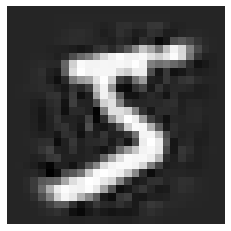

5


In [54]:
img = pca.inverse_transform(new_X_train[0]*255)
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])

In [55]:
clf = SVC()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 0.9936666666666667
測試資料辨識率: 0.9829
Precision: 0.9829064874084095
Recall: 0.9828086278937803


# KNN+PCA(200)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 0.9827333333333333
測試資料辨識率: 0.9698
Precision: 0.9702129423823432
Recall: 0.9694837725359454


# DecisionTree+PCA(200)

In [57]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.8302
Precision: 0.8280585886954961
Recall: 0.8277011520489929


# RandomForest+PCA(200)

In [58]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.9462
Precision: 0.9456524004539173
Recall: 0.94560743936756


# 使用SVC(Support Vector Classification)進行模型的訓練與辨識
# SVC+PCA(400)

In [59]:
pca = PCA(n_components=400)
new_X_train = pca.fit_transform(X_train)
new_X_test = pca.transform(X_test)
new_X_train = new_X_train/255
new_X_test = new_X_test/255
print(pca.n_components_)
print(sum(pca.explained_variance_ratio_))

400
0.9957635820443839


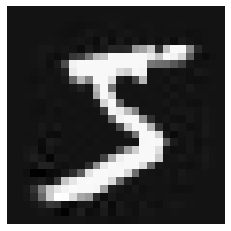

5


In [60]:
img = pca.inverse_transform(new_X_train[0]*255)
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])

In [61]:
clf = SVC()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 0.9940666666666667
測試資料辨識率: 0.9823
Precision: 0.9823158305193701
Recall: 0.9822291961713715


# KNN+PCA(400)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 0.9819166666666667
測試資料辨識率: 0.9687
Precision: 0.9691702424867026
Recall: 0.9683784832944665


# DecisionTree+PCA(400)

In [63]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.8175
Precision: 0.8150352969149468
Recall: 0.8147546129192846


# RandomForest+PCA(400)

In [64]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.9359
Precision: 0.9354514119187091
Recall: 0.9351589709737294


# 使用SVC(Support Vector Classification)進行模型的訓練與辨識
# SVC+PCA(500)

In [65]:
pca = PCA(n_components=500)
new_X_train = pca.fit_transform(X_train)
new_X_test = pca.transform(X_test)
new_X_train = new_X_train/255
new_X_test = new_X_test/255
print(pca.n_components_)
print(sum(pca.explained_variance_ratio_))

500
0.9992464222125766


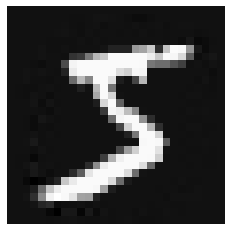

5


In [66]:
img = pca.inverse_transform(new_X_train[0]*255)
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])

In [67]:
clf = SVC()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 0.9941
測試資料辨識率: 0.9824
Precision: 0.9824151927105502
Recall: 0.9823310291652614


# KNN+PCA(500)

In [68]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 0.9818166666666667
測試資料辨識率: 0.9687
Precision: 0.9691652027324155
Recall: 0.9683690450756656


#  DecisionTree+PCA(500)

In [69]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.82
Precision: 0.817516082953088
Recall: 0.8172566035471377


# RandomForest+PCA(500)

In [70]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))
print("Precision:",precision_score(Y_test, clf.predict(new_X_test), average='macro'))
print("Recall:",recall_score(Y_test, clf.predict(new_X_test), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.923
Precision: 0.9223327673818552
Recall: 0.9218260741960712
